# Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Описание данных

- **CUST_ID**: Идентификатор держателя кредитной карты (категориальный признак)

- **BALANCE**: Остаток средств на счёте, доступных для покупок

- **BALANCE_FREQUENCY**: Частота обновления баланса (значение от 0 до 1, где 1 = часто обновляется)

- **PURCHASES**: Общая сумма покупок, совершённых с карты

- **ONEOFF_PURCHASES**: Максимальная сумма одной покупки

- **INSTALLMENTS_PURCHASES**: Сумма покупок, оплаченных в рассрочку

- **CASH_ADVANCE**: Сумма, выданная пользователю в виде аванса наличными

- **PURCHASES_FREQUENCY**: Частота совершения покупок (от 0 до 1)

- **ONEOFF_PURCHASES_FREQUENCY**: Частота крупных (разовых) покупок (от 0 до 1)

- **PURCHASES_INSTALLMENTS_FREQUENCY**: Частота покупок в рассрочку (от 0 до 1)

- **CASH_ADVANCE_FREQUENCY**: Частота получения аванса наличными (от 0 до 1)

- **CASH_ADVANCE_TRX**: Количество транзакций с авансом наличными

- **PURCHASES_TRX**: Количество покупок (транзакций)

- **CREDIT_LIMIT**: Кредитный лимит пользователя

- **PAYMENTS**: Общая сумма платежей, произведённых пользователем

- **MINIMUM_PAYMENTS**: Минимальная сумма, оплаченная пользователем

- **PRC_FULL_PAYMENT**: Процент, уплаченный полностью от общей задолженности

- **TENURE**: Срок обслуживания пользователя (в месяцах)


In [2]:
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# EDA

In [3]:
df.shape

(8950, 18)

In [4]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.drop(columns='CUST_ID', inplace=True)

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Заполняю одно пропущенное значение меиданой, а в MINIMUM_PAYMENTS пропущенные значения предсказываю с помощью линейной регрессии

In [8]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [9]:
train_df = df[df['MINIMUM_PAYMENTS'].notna()]
predict_df = df[df['MINIMUM_PAYMENTS'].isna()]

features = df.columns.drop('MINIMUM_PAYMENTS')

X_train = train_df[features]
y_train = train_df['MINIMUM_PAYMENTS']

X_predict = predict_df[features]

model = LinearRegression()
model.fit(X_train, y_train)

predicted_values = model.predict(X_predict)

df.loc[df['MINIMUM_PAYMENTS'].isna(), 'MINIMUM_PAYMENTS'] = predicted_values

In [10]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Визуализирую разбросы данных для каждой фичи

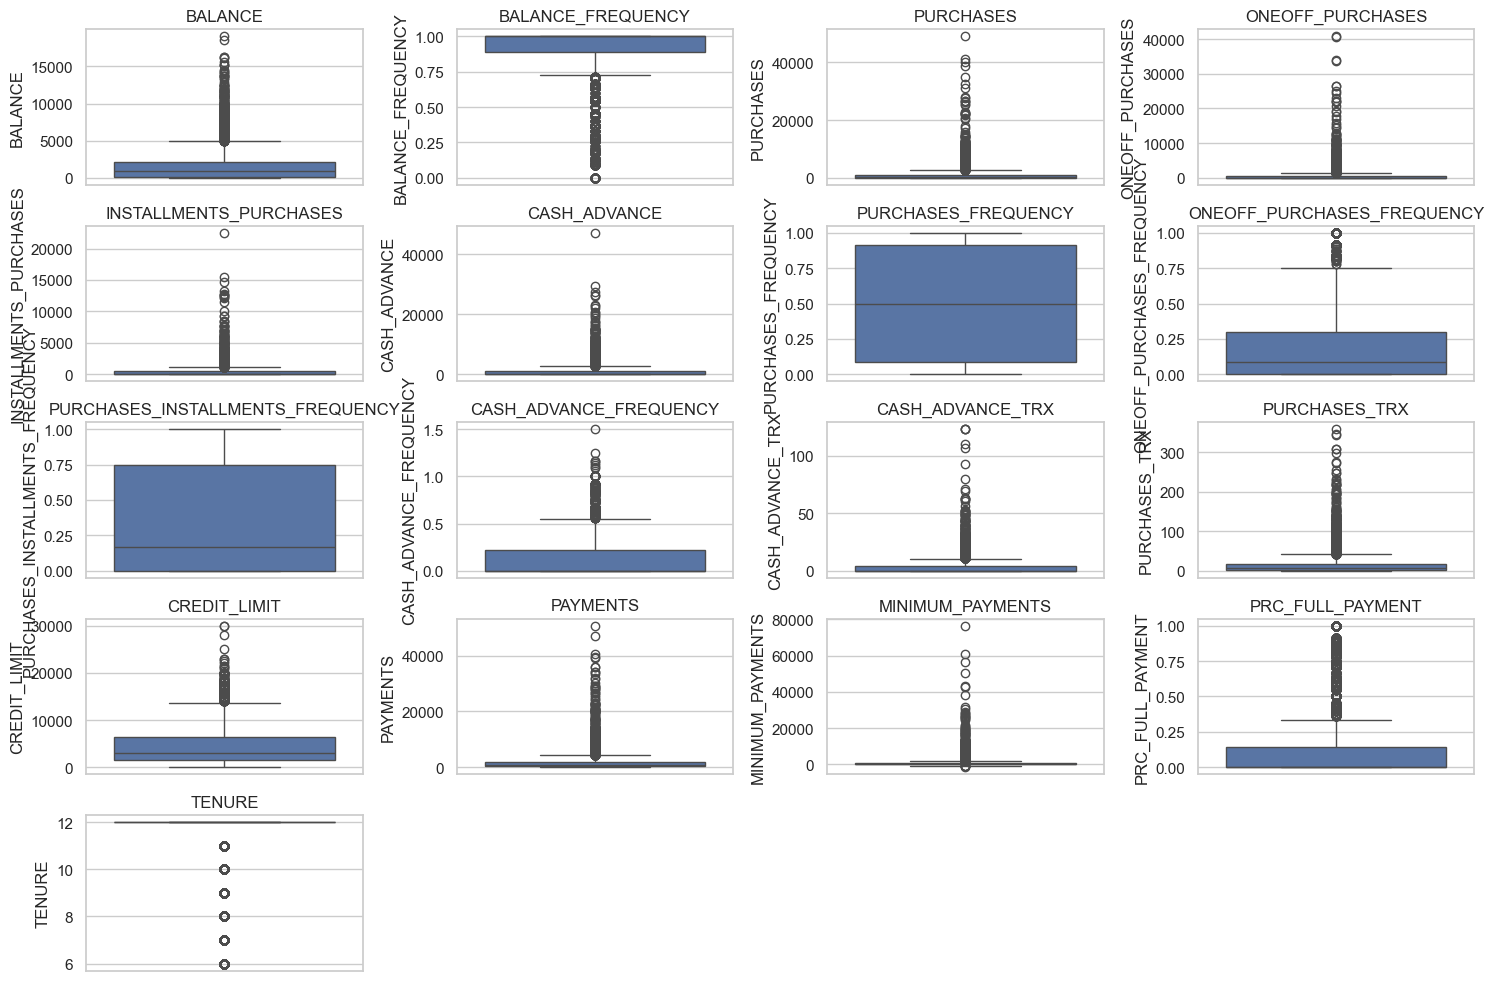

In [11]:
columns = df.columns
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot((len(columns) + 3) // 4, 4, i)  
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Визуализация распределения данных для каждой фичи

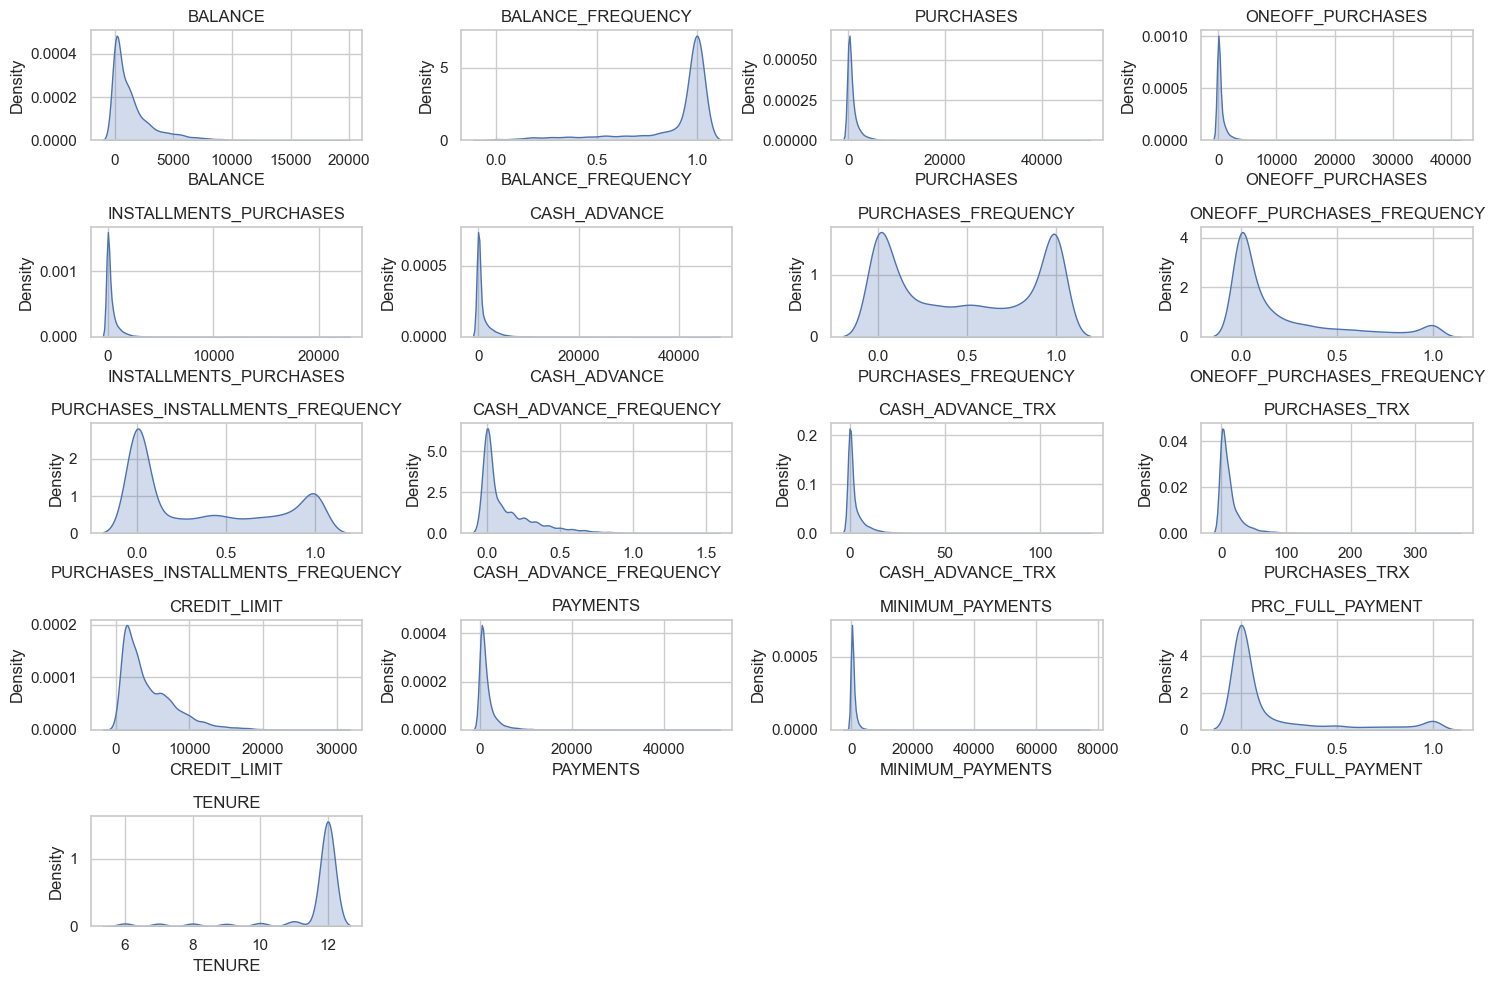

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns, 1):
    plt.subplot((len(columns) + 3) // 4, 4, i) 
    sns.kdeplot(x=df[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

### Удаляю сильные выбросы, ориентируясь на интерквартальный размах

In [13]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 #интерквартальный размах
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))] #фильтруем значения, которые не являются выбросами
    return df

for col in columns:
    if col!='TENURE':
        df = remove_outliers(df, col)
    
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,-149.714350,0.00,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,438.442488,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6


### Визуализирую матрицу корреляции

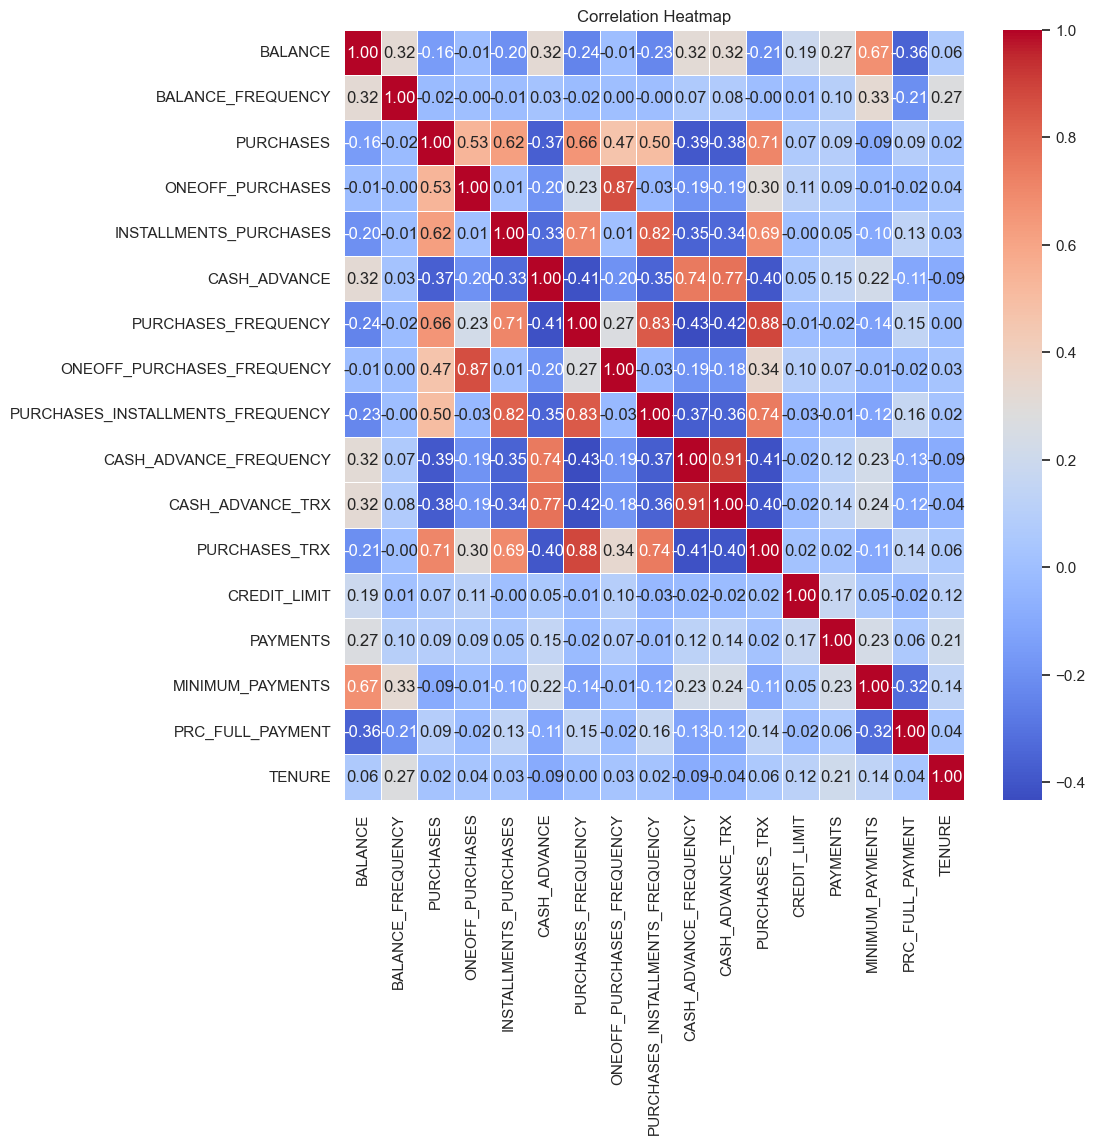

In [14]:
corr_matrix = df.corr(method='kendall')

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Если модуль корреляции между признаками больше 0.85, то удаляем один из признаков, рассмотрев триугольный вид матрицы

In [15]:
corr_matrix = df.corr(method='kendall').abs()

upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)
upper_triangle_corr = pd.DataFrame(upper_triangle * corr_matrix, 
                                   columns=corr_matrix.columns, 
                                   index=corr_matrix.index)


to_drop = [column for column in upper_triangle_corr.columns 
           if any(upper_triangle_corr[column] > 0.8)]

# Удаляем выбранные признаки
df = df.drop(columns=to_drop)

print(f"Удаленные признаки: {to_drop}")

Удаленные признаки: ['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']


### Удаляем константные и квазиконстантные признаки

In [16]:
selector = VarianceThreshold(threshold=0.001)

selector.fit(df)

remaining_features = df.columns[selector.get_support()]

final_columns = list(remaining_features)

columns = df.columns

delete_col = []

for col in columns:
    if col not in final_columns:
        delete_col.append(col)


print(f"Удаленные признаки: {delete_col}")

Удаленные признаки: []


### Стандартизируем данные (приводим к нормальному распределению со средним значением 0 и стандартным отклонением 1), так как модели кластеризации и PCA чувствительны к масштабу признаков

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

# K-means

В этом методе нужно заранее решить, сколько кластером хотим выделить и случайным образом иннициализируются центры кластеров. После этого рекурсивно повторяется алгоритм: каждом точке присваиваем тот кластер, чей центр ближе; пересчитываем центры классов в направление центра масс. (Подсчитывается евклидово расстояние)

In [18]:
best_score = -1
best_k = None
best_labels = None
results = []

for k in range(2, 16): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    results.append((k, score))
    if score > best_score:
        best_score = score
        best_k = k
        best_labels = labels

print(f"Лучший Silhouette: {best_score:.4f} при k={best_k}")

mask = best_labels != -1
ch_score = calinski_harabasz_score(X[mask], best_labels[mask])

print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Лучший Silhouette: 0.1880 при k=2
Calinski-Harabasz Score: 531.35


### With two PCA features

Посмотрим, как сработал алгоритм на двух фичах и визуализируем

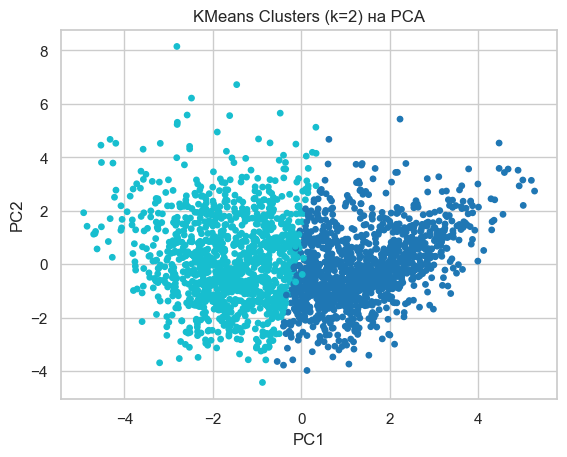

In [19]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap='tab10', s=15)
plt.title('KMeans Clusters (k=2) на PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# DBSCAN

Этот алгоритм способен выявлять более сложные формы, чем k-means. В качестве параметров используется e - радиус, определяет максимальное расстояние между двумя точками; min_samples - определяет какое количество точек должно быть в радиусе центровой, чтоб она считалась центром.

In [20]:
eps_values = np.linspace(1.0, 2.4, 15)
min_samples_values = [5, 6, 7, 8, 9]

best_score = -1
best_params = {}
results = []
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:
            continue
        
        try:
            sil_score = silhouette_score(X, labels)
            ch_score = calinski_harabasz_score(X[labels != -1], labels[labels != -1])
        except:
            continue
        
        results.append((eps, min_samples, sil_score, ch_score))
        
        if sil_score > best_score:
            best_score = sil_score
            best_params = {'eps': eps, 'min_samples': min_samples}
            best_labels = labels
            best_ch_score = ch_score

print(f"Лучший Silhouette: {best_score:.4f} при eps={best_params['eps']:.2f}, min_samples={best_params['min_samples']}")
print(f"Calinski-Harabasz Score: {best_ch_score:.2f}")


Лучший Silhouette: 0.2016 при eps=2.30, min_samples=5
Calinski-Harabasz Score: 7.66


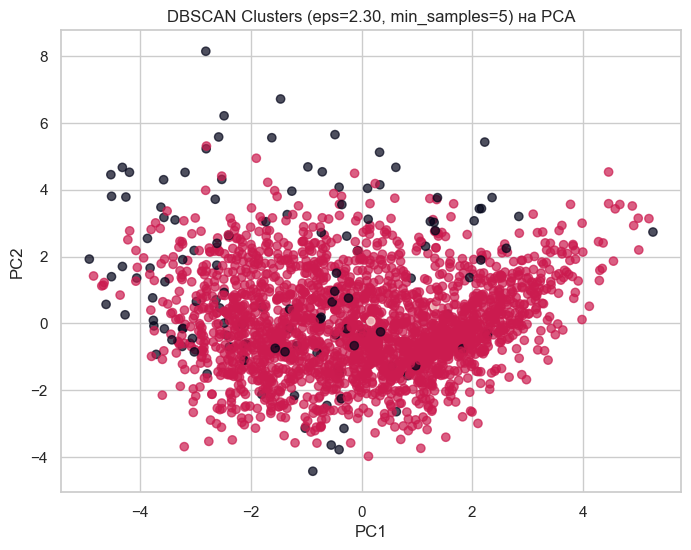

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, alpha=0.7)
plt.title(f'DBSCAN Clusters (eps={best_params["eps"]:.2f}, min_samples={best_params["min_samples"]}) на PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# BIRCH

Этот алгоритм построен на основе CF-дерева, где каждая ветка это набор похожих точек, которые хрнаятся в формате (N, LS, SS) , то есть (количество точек в узле, сумма координат, сумма квадратов координат), это позволяет задействовать меньше памяти и быстро вычислять центр, разброс и расстояние между кластерами. Если в узле оказывается слишком много ветвей, то расщипляется на более мелкие уровни. При принятии решения можно использовать каждый лист как отдельный кластер, либо применить к листьям K-means.

### Плюсы:
Хорошо определяет сферические формы кластеров, быстро работает, занимает мало памяти, эффективен для больших данных, можно использовать для входа K-means

### Минусы
Радиус кластеров (treashold) определяется вручную подбором, плохо работает с нестандартным видом кластера, не распознает выбросы, 

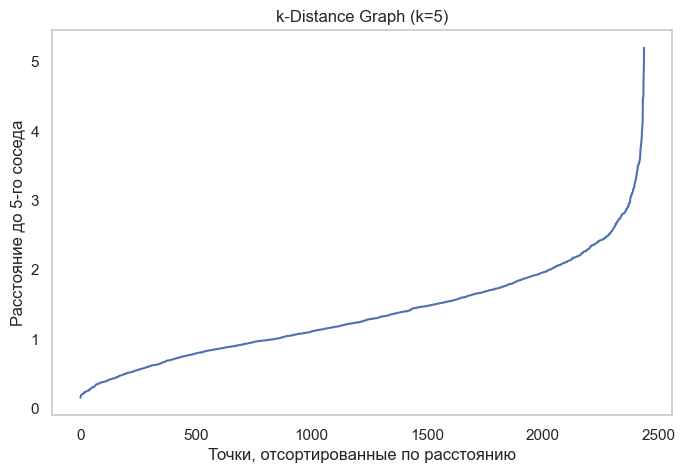

In [22]:
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

k_distances = distances[:, -1]
k_distances_sorted = np.sort(k_distances)

plt.figure(figsize=(8,5))
plt.plot(k_distances_sorted)
plt.title(f'k-Distance Graph (k={k})')
plt.xlabel('Точки, отсортированные по расстоянию')
plt.ylabel(f'Расстояние до {k}-го соседа')
plt.grid()
plt.show()


In [23]:
threshold = np.percentile(k_distances, 98)
print("Порог для BIRCH по 98%-квантилю:", threshold)

Порог для BIRCH по 98%-квантилю: 3.1205906996999757


In [24]:
birch_model = Birch(threshold=threshold, n_clusters=2)
birch_model.fit(X)

labels = birch_model.labels_
df['BIRCH_CLUSTER'] = labels 

In [25]:
df['BIRCH_CLUSTER'].value_counts()

BIRCH_CLUSTER
0    2433
1       7
Name: count, dtype: int64

In [26]:
score = silhouette_score(X, df['BIRCH_CLUSTER'])
print("Silhouette Score (cleaned):", round(score, 4))

mask = best_labels != -1
ch_score = calinski_harabasz_score(X[mask], best_labels[mask])

print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Silhouette Score (cleaned): 0.4155
Calinski-Harabasz Score: 7.66


In [27]:
threshold_values = np.linspace(0.5, 3.5, 20)
n_cluster_values = [2, 3, 4, 5, 6, 7]

results = []
best_score = -1
best_labels = None

for threshold in threshold_values:
    for n_clusters in n_cluster_values:
        birch = Birch(threshold=threshold, n_clusters=n_clusters)
        labels = birch.fit_predict(X)

        if len(set(labels)) < 2:
            continue  
        
        try:
            sil_score = silhouette_score(X, labels)
            ch_score = calinski_harabasz_score(X, labels)
        except:
            continue
        
        results.append((threshold, n_clusters, sil_score, ch_score))

        if sil_score > best_score:
            best_score = sil_score
            best_params = {'threshold': threshold, 'n_clusters': n_clusters}
            best_labels = labels
            best_ch = ch_score

print(f"Лучший Silhouette: {best_score:.4f} при threshold={best_params['threshold']:.3f}, n_clusters={best_params['n_clusters']}")
print(f"Calinski-Harabasz Score: {best_ch:.2f}")

Лучший Silhouette: 0.3109 при threshold=3.342, n_clusters=2
Calinski-Harabasz Score: 79.19


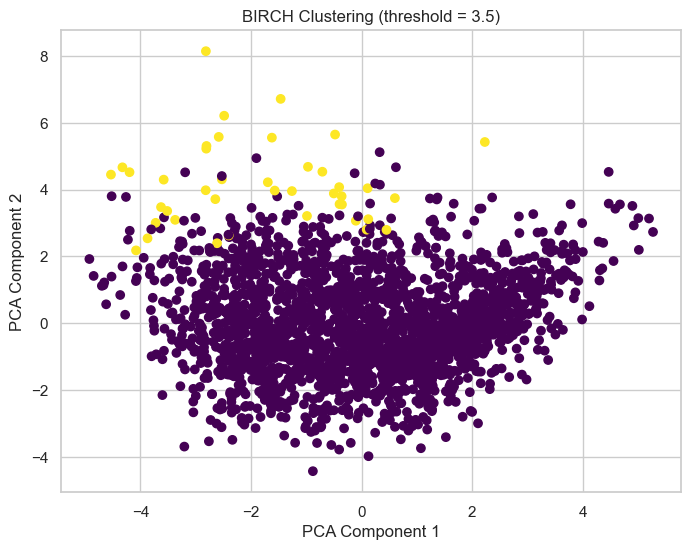

In [28]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis')
plt.title(f"BIRCH Clustering (threshold = {threshold})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# Метрики

- **Silhouette Score** показывает насколько каждый объект ближе к своему кластеру, чем к чужому. (чем ближе к 1, тем лучше)
- **Calinski-Harabasz Index (CH-индекс)** Он измеряет, насколько кластеры хорошо отделены друг от друга и насколько они внутри себя компактны. (чем больше, тем лучше)